In [1]:
# imports

import networkx as nx
import matplotlib.pyplot as plt
import random

In [19]:
# load network

type_network = "nonmutual"
graph = nx.read_gml(f'../out/largest_32_RISJDR_{type_network}.gml', label='id')

Name: Mobile Call Graph (nonmutual)
Type: Graph
Number of nodes: 37678
Number of edges: 52937
Average degree:   2.8100
Density: 7.458047832867506e-05
Min degree: 1
Max degree: 29
Clustering coefficient: 0.1076757726904436


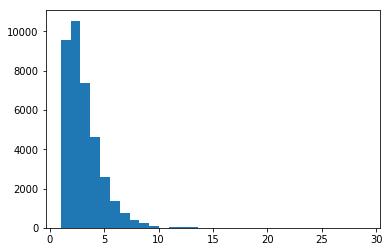

In [20]:
# calculate the metrics for nonmutual network

# set a name for the graph
graph.name = f"Mobile Call Graph ({type_network})"

# info of the graph
info = nx.info(graph)
print(info)

# get the density
density = nx.density(graph)
print(f"Density: {density}")

# get max degree
degrees = [graph.degree(n) for n in graph.nodes()]
max_degree = max(degrees)
min_degree = min(degrees)
print(f"Min degree: {min_degree}")
print(f"Max degree: {max_degree}")

# clustering coefficient
average_clustering = nx.average_clustering(graph)
print(f"Clustering coefficient: {average_clustering}")


# degree distribution
degrees = [graph.degree(n) for n in graph.nodes()]
plt.hist(degrees, 31)
plt.show()

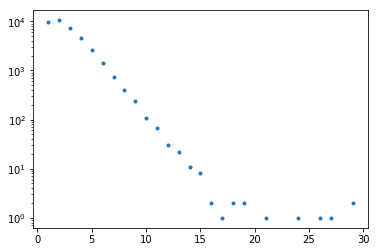

In [27]:
from collections import Counter

degrees = Counter(dict(nx.degree(graph)).values())

ax = plt.gca()
ax.scatter(degrees.keys(), degrees.values(), marker='.')
ax.set_yscale('log')
plt.show()

In [21]:
# diameter
#diameter = nx.algorithms.distance_measures.diameter(graph)
#print(f"Diameter: {diameter}")

In [22]:
# sampLing
#random_node = random.randrange(nx.number_of_nodes(graph))
random_node = 3 
# obtem o subgrafo com todos os nos aLcancaveis para um L = 5
subgraph = nx.ego_graph(graph, random_node, 5)

shortest_paths = dict(nx.all_pairs_shortest_path(subgraph))[random_node]
mapping_color = {'1': 'black', '2': 'blue', '3': 'green', '4': 'purple', '5':'red' , '6': 'orange'}
#mapping_color = {'1': 0.1, '2': 0.2, '3': 0.3, '4': 0.4, '5':0.5 , '6': 0.6}
mapping_size = {'1': 100, '2': 80, '3': 50, '4': 35, '5': 30 , '6': 20}

colors = []
distances = []

for node in subgraph.nodes():
    distance = len(shortest_paths[node])
    colors.append(mapping_color[str(distance)])
    distances.append(mapping_size[str(distance)])
    #distances.append(distance)

nx.write_gml(subgraph, "subgraph.gml")


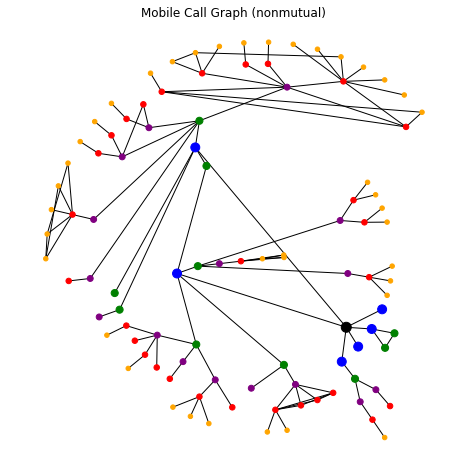

In [23]:
# plot the network

from networkx.drawing.nx_agraph import graphviz_layout

# titulo

#pos = nx.spring_layout(subgraph)  
pos = graphviz_layout(subgraph, prog="twopi", args="")

#nx.draw(subgraph, pos, node_size=distances, with_labels=False, node_color=colors)

plt.figure(figsize=(8, 8))
plt.title(f'Mobile Call Graph ({type_network})', color="black")

nx.draw(subgraph, pos, node_size=distances, node_color=colors, with_labels=False)
plt.axis("equal")

plt.show()

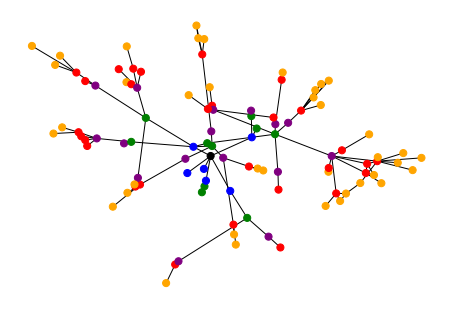

In [24]:
# Draw graph
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_color=colors, node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
plt.show()

In [25]:
# sampLing
#random_node = random.randrange(nx.number_of_nodes(graph))
random_node = 3 
# obtem o subgrafo com todos os nos aLcancaveis para um L = 5
subgraph = nx.ego_graph(graph, random_node, 6)

shortest_paths = dict(nx.all_pairs_shortest_path(subgraph))[random_node]
mapping_color = {'1': 'black', '2': 'blue', '3': 'green', '4': 'purple', '5':'red' , '6': 'orange', '7': 'cyan'}
#mapping_color = {'1': 0.1, '2': 0.2, '3': 0.3, '4': 0.4, '5':0.5 , '6': 0.6}
mapping_size = {'1': 100, '2': 80, '3': 50, '4': 35, '5': 30 , '6': 20, '7': 16}

colors = []
distances = []

for node in subgraph.nodes():
    distance = len(shortest_paths[node])
    colors.append(mapping_color[str(distance)])
    distances.append(mapping_size[str(distance)])
    #distances.append(distance)

nx.write_gml(subgraph, "subgraph.gml")

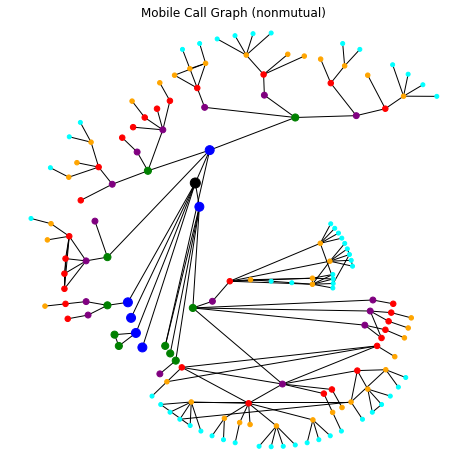

In [26]:
# plot snowballing sampling of the network

from networkx.drawing.nx_agraph import graphviz_layout

# titulo

#pos = nx.spring_layout(subgraph)  
pos = graphviz_layout(subgraph, prog="twopi", args="")

#nx.draw(subgraph, pos, node_size=distances, with_labels=False, node_color=colors)

plt.figure(figsize=(8, 8))
plt.title(f'Mobile Call Graph ({type_network})', color="black")

nx.draw(subgraph, pos, node_size=distances, node_color=colors, with_labels=False)
plt.axis("equal")

plt.show()

In [28]:
from collections import Counter

Counter([1,2,3,4,4,5,7]).keys()

dict_keys([1, 2, 3, 4, 5, 7])